In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# LOAD DATA
df = pd.read_csv("/content/drive/MyDrive/study_log_export.csv")
df.head()


,id,user_id,date,study_hours,social_media_hours,sleep_hours,stress_level,exam_score,notes
0,640904,9,2024-02-02 00:00:00,4.410518,1.1,9.3,6.7,95.0,NaN
1,640905,9,2025-05-20 00:00:00,1.500000,4.2,7.1,3.8,80.0,NaN
2,640906,9,2025-03-05 00:00:00,3.600000,4.5,7.9,3.9,69.0,NaN
3,640907,9,2024-01-28 00:00:00,3.400000,2.8,6.9,4.5,92.0,NaN
4,640908,9,2023-07-26 00:00:00,5.000000,1.9,7.7,4.9,96.0,NaN


In [6]:
features = ["study_hours",
            "social_media_hours",
            "sleep_hours",
            "stress_level",
            "exam_score"]

X = df[features].copy()
X = X.fillna(X.mean())


In [7]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


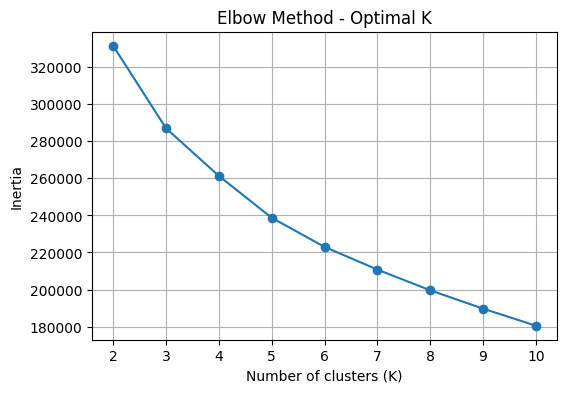

In [8]:
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.grid()
plt.show()


In [10]:
print("Silhouette Score for Different K Values:")
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_X)
    sil = silhouette_score(scaled_X, labels)
    print(f"K = {k} → Silhouette Score = {sil}")


Silhouette Score for Different K Values:


KeyboardInterrupt: 

In [16]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_X)

df.groupby("Cluster")[features].mean()


,study_hours,social_media_hours,sleep_hours,stress_level,exam_score
Cluster,,,,,
0,2.966260,2.448474,6.625969,5.772588,72.028854
1,5.717476,3.181697,6.891096,6.575372,94.078949
2,4.403301,1.042610,7.217759,4.482527,94.181602
3,3.595631,3.704027,7.232278,3.637810,93.366972


In [17]:
def assign_rule_cluster(row):

    # 1. High Performers / Balanced
    if (row["study_hours"] >= 4 and
        row["exam_score"] >= 80 and
        row["social_media_hours"] <= 2.5 and
        row["stress_level"] <= 4.5 ):
        return "High Performers"

    # 2. Stressed Achievers
    if (row["study_hours"] >= 4 and
        row["exam_score"] >= 70 and
        row["stress_level"] >= 6):
        return "Stressed Achiever"

    # 3. Distracted
    if (row["social_media_hours"] >= 3 or
        row["stress_level"] <= 4 and
        row["exam_score"] <= 65):
        return "Distracted"

    # Default
    return "Average"

df["Rule_Based_Cluster"] = df.apply(assign_rule_cluster, axis=1)

df[["study_hours","social_media_hours","sleep_hours",
    "stress_level","exam_score","Rule_Based_Cluster"]].head()

,study_hours,social_media_hours,sleep_hours,stress_level,exam_score,Rule_Based_Cluster
0,4.410518,1.1,9.3,6.7,95.0,Stressed Achiever
1,1.500000,4.2,7.1,3.8,80.0,Distracted
2,3.600000,4.5,7.9,3.9,69.0,Distracted
3,3.400000,2.8,6.9,4.5,92.0,Average
4,5.000000,1.9,7.7,4.9,96.0,Average


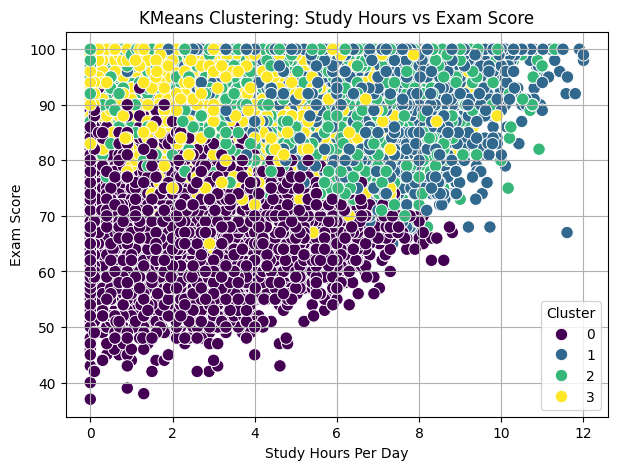

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="study_hours",
    y="exam_score",
    hue="Cluster",
    palette="viridis",
    s=80
)
plt.title("KMeans Clustering: Study Hours vs Exam Score")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

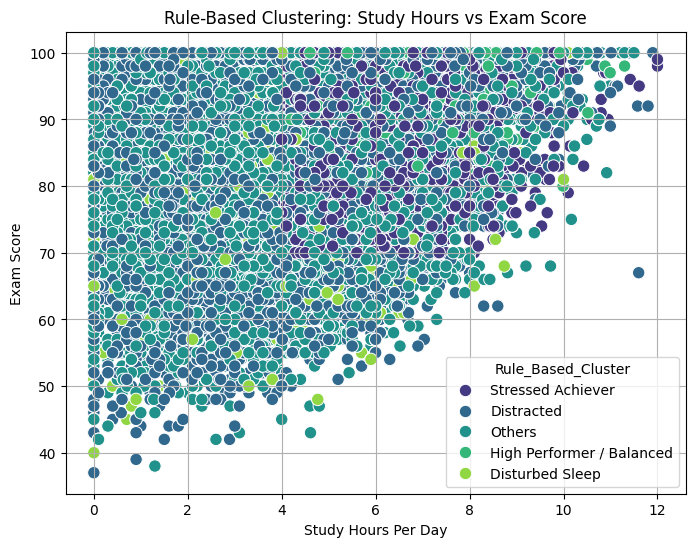

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="study_hours",
    y="exam_score",
    hue="Rule_Based_Cluster",
    palette="viridis",
    s=80
)
plt.title("Rule-Based Clustering: Study Hours vs Exam Score")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Exam Score")
plt.grid(True)
plt.show()

In [ ]:
recommendations = {
    "High Performer / Balanced": [
        "Maintain current habits",
        "Focus on skill development",
        "Try advanced learning projects"
    ],

    "Stressed Achiever": [
        "Practice meditation",
        "Do stress management techniques",
        "Take regular breaks"
    ],

    "Distracted": [
        "Use Pomodoro technique",
        "Reduce social media usage",
        "Use focus apps"
    ],

    "Disturbed Sleep": [
        "Improve sleep schedule",
        "Avoid screens at night",
        "Maintain 7-8 hours sleep"
    ],

    "Others": [
        "General study improvement plan"
    ]
}

recommendations


{'High Performer / Balanced': ['Maintain current habits',
  'Focus on skill development',
  'Try advanced learning projects'],
 'Stressed Achiever': ['Practice meditation',
  'Do stress management techniques',
  'Take regular breaks'],
 'Distracted': ['Use Pomodoro technique',
  'Reduce social media usage',
  'Use focus apps'],
 'Disturbed Sleep': ['Improve sleep schedule',
  'Avoid screens at night',
  'Maintain 7-8 hours sleep'],
 'Others': ['General study improvement plan']}

In [18]:
df.to_csv("/content/drive/MyDrive/cluster_output.csv", index=False)
print("Saved as changed_student_cluster_output.csv")


Saved as changed_student_cluster_output.csv


In [19]:
import joblib
joblib.dump(kmeans, "/content/drive/MyDrive/student_cluster_model.pkl")
joblib.dump(scaler,  "/content/drive/MyDrive/student_scaler.pkl")
print("AI model saved forever!")

AI model saved forever!
